In [1]:
### IMPORTS ###
# Quantum libraries:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

# Plotting
from matplotlib import pyplot as plt
import plotly

# Other
import os, sys
import time

import copy
import tqdm # Pretty progress bars
from IPython.display import Markdown, display # Better prints
import joblib # Writing and loading
from noisyopt import minimizeSPSA
import optuna # Automatic tuning tool

import multiprocessing

import warnings
warnings.filterwarnings("ignore", message="For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires.Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.")

##############

# My functions:
sys.path.insert(0, '../phase-estimation/')
import vqe_functions as vqe
import qcnn_functions as qcnn

Text(0, 0.5, '(%)')

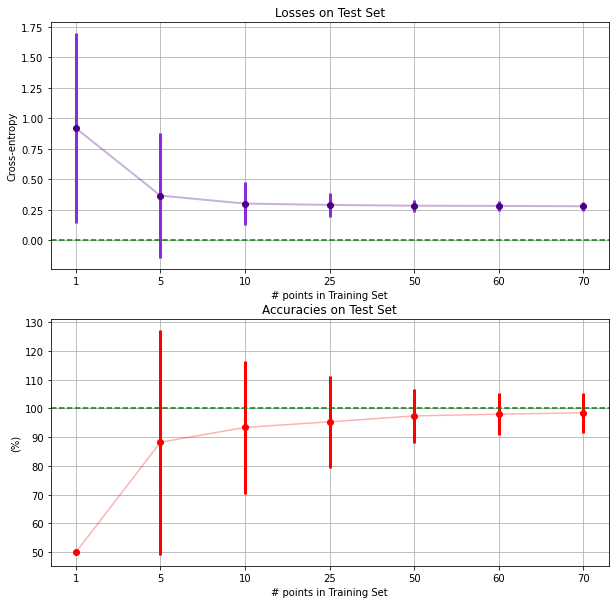

In [12]:
loss_means, loss_devs = joblib.load('./small_sets/N8e3000subs1-5-10-25-50-60-70/loss.job')
acc_means, acc_devs = joblib.load('./small_sets/N8e3000subs1-5-10-25-50-60-70/acc.job')

npoints_list = [1,5,10,25,50,60,70]
N = 8
J = 1

fig, ax = plt.subplots(2, 1, figsize=(10,10))
            
ax[0].plot(np.arange(len(npoints_list)), loss_means, color='indigo', lw = 2, alpha = 0.3)
ax[0].errorbar(np.arange(len(npoints_list)), loss_means, yerr=3*np.array(loss_devs), fmt='o', color='indigo',
               ecolor='blueviolet', elinewidth=3, capsize=0)
ax[0].set_xticks(np.arange(len(npoints_list)))
ax[0].set_xticklabels(npoints_list)
ax[0].grid(True)
ax[0].set_title('Losses on Test Set'.format(N,J))
ax[0].set_xlabel('# points in Training Set')
ax[0].set_ylabel('Cross-entropy')
ax[0].axhline(y=0, color='green', linestyle='--')

ax[1].plot(np.arange(len(npoints_list)), acc_means, color='red', ms = 7, alpha = 0.3)
ax[1].errorbar(np.arange(len(npoints_list)), acc_means, yerr=3*np.array(acc_devs),fmt='o', color='red',
               ecolor='red', elinewidth=3, capsize=0)
ax[1].set_xticks(np.arange(len(npoints_list)))
ax[1].set_xticklabels(npoints_list)
ax[1].axhline(y=100, color='green', linestyle='--')
ax[1].grid(True)
ax[1].set_title('Accuracies on Test Set')
ax[1].set_xlabel('# points in Training Set')
ax[1].set_ylabel('(%)')
